In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df =pd.read_csv('../data/output/indobert_labeled_data.csv')

ASPECT EXTRACTION

In [15]:
# Definisikan kata kunci untuk setiap aspek
produk_keywords = ["rasa", "menu", "variasi", "porsi", "harga", "kopi", "teh", "minum", "enak", "mahal", "murah", "cukup", "lezat", "kualitas", "fresh", "bahan", "resep", "beli","butterscotch","gelas","gelasnya","cup","cupnya","esbatu","es batu","cocomint","choco mint","gula"]
pelayanan_keywords = ["staf", "pegawai", "layan", "service", "ramah", "cepat", "antri", "pelayan", "kasir", "judes","respon", "sopan"]
promosi_keywords = ["promo", "diskon", "gratis", "bundling", "loyalty", "gopay", "voucher", "cashback", "b1g1","voc","aplikasi"]

# Fungsi untuk memetakan aspek berdasarkan kata kunci
def detect_aspects(text):
    text_lower = str(text).lower()
    if any(keyword in text_lower for keyword in produk_keywords):
        return "Produk"
    elif any(keyword in text_lower for keyword in pelayanan_keywords):
        return "Pelayanan"
    elif any(keyword in text_lower for keyword in promosi_keywords):
        return "Promosi"
    else:
        return "Lainnya"

df['Aspects'] = df['Text'].apply(detect_aspects)

ASPECT-SENTIMENT PAIRING

In [16]:
# Pecah jika ada lebih dari satu aspek
df_exploded = df.explode('Aspects')

# Output: setiap baris punya 1 (aspect, sentiment)
df_exploded = df_exploded.rename(columns={'Label_Bert': 'Sentiment'})


AGGREGATION & ANALYSIS

In [17]:
# Hitung frekuensi kombinasi Aspect-Sentiment
aspect_sentiment_freq = df_exploded.groupby(['Aspects', 'Sentiment']).size().unstack(fill_value=0)

# Total per aspek
aspect_sentiment_freq['Total'] = aspect_sentiment_freq.sum(axis=1)

# Persentase
aspect_sentiment_percent = aspect_sentiment_freq.div(aspect_sentiment_freq['Total'], axis=0) * 100


VISUALIZATION

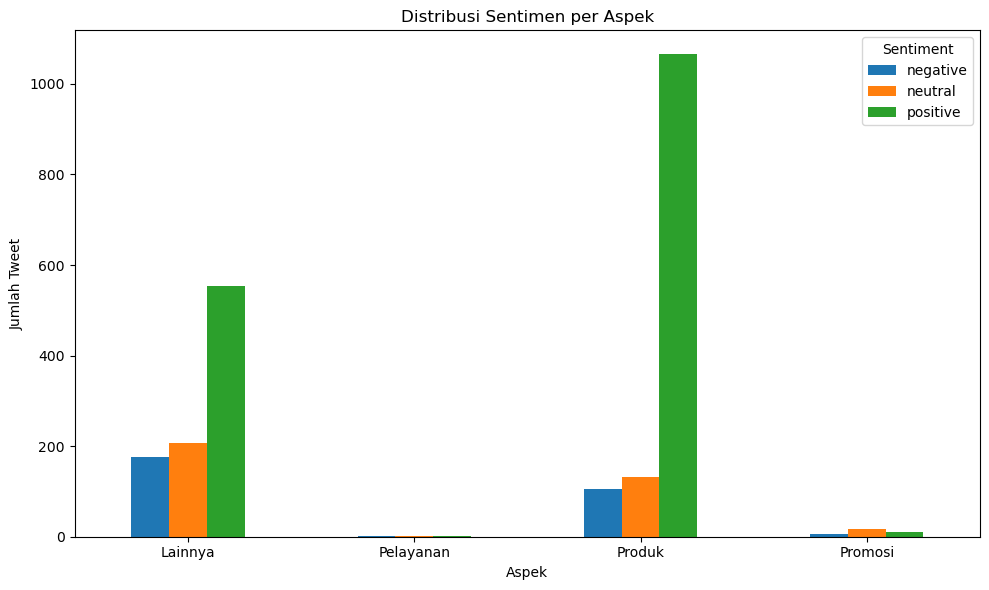

In [18]:
# Bar chart distribusi sentimen per aspek
aspect_sentiment_freq.drop(columns='Total').plot(kind='bar', stacked=False, figsize=(10,6))
plt.title("Distribusi Sentimen per Aspek")
plt.ylabel("Jumlah Tweet")
plt.xlabel("Aspek")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

INSIGHT & RECOMMENDATIONS

In [19]:
# Temukan aspek dominan dan sentimen tertinggi
top_aspects = aspect_sentiment_freq.sort_values('Total', ascending=False).head(3)

print("Aspek yang paling banyak dibicarakan:")
print(top_aspects)

print("\nInsight strategis:")
for aspek in top_aspects.index:
    dom_sent = aspect_sentiment_freq.loc[aspek].drop('Total').idxmax()
    print(f"- {aspek.capitalize()}: Dominasi sentimen '{dom_sent}' → fokus pada evaluasi aspek ini.")


Aspek yang paling banyak dibicarakan:
Sentiment  negative  neutral  positive  Total
Aspects                                      
Produk          105      131      1065   1301
Lainnya         176      208       553    937
Promosi           5       17        11     33

Insight strategis:
- Produk: Dominasi sentimen 'positive' → fokus pada evaluasi aspek ini.
- Lainnya: Dominasi sentimen 'positive' → fokus pada evaluasi aspek ini.
- Promosi: Dominasi sentimen 'neutral' → fokus pada evaluasi aspek ini.
